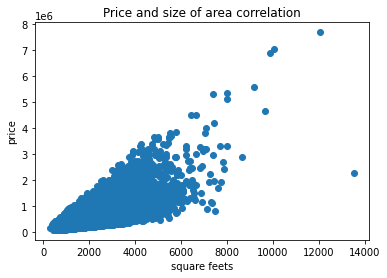

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#df import
df1 = pd.read_csv("./data/kc_house_data.csv")

#Price-area graph
x = df1['sqft_living']
y = df1['price']

plt.scatter(x, y)
plt.title('Price and size of area correlation')
plt.xlabel('square feets')
plt.ylabel('price')
plt.show()


In [241]:
#Search for the maximum, minimum and average price
p = df1['price']

print("max =", p.max())
print("min =", p.min())
print("average =", p.mean())


max = 7700000.0
min = 75000.0
average = 540088.1417665294


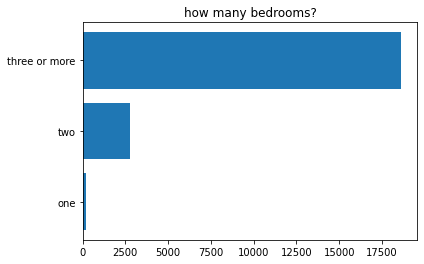

In [242]:
#Bedrooms chart
b = df1['bedrooms']

one_bedroom, two_bedrooms, three_or_more = [], [], []

for i in b:
    if (i == 1):
        one_bedroom.append(i)
    elif (i == 2):
        two_bedrooms.append(1)
    elif (i >= 3):
        three_or_more.append(1)

quantity = [len(one_bedroom), len(two_bedrooms), len(three_or_more)]
bedrooms = ['one', 'two', 'three or more']

plt.barh(bedrooms, quantity)

plt.title('how many bedrooms?')

plt.show()

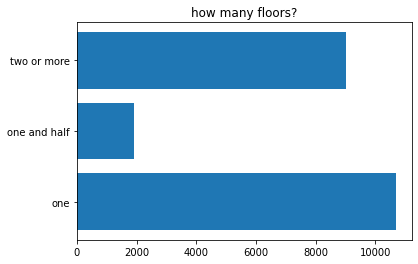

In [243]:
#Floors chart
f = df1['floors']

one_floor, one_and_half, two_or_more = [], [], []

for i in f:
    if (i == 1):
        one_floor.append(i)
    elif (i == 1.5):
        one_and_half.append(1)
    elif (i >= 2):
        two_or_more.append(1)

quantity = [len(one_floor), len(one_and_half), len(two_or_more)]
floors = ['one', 'one and half', 'two or more']

plt.barh(floors, quantity)

plt.title('how many floors?')

plt.show()

16768   2014-05-02
9596    2014-05-02
9587    2014-05-02
20602   2014-05-02
11577   2014-05-02
           ...    
7898    2015-05-14
928     2015-05-14
5637    2015-05-15
13053   2015-05-24
16594   2015-05-27
Name: date, Length: 21613, dtype: datetime64[ns]


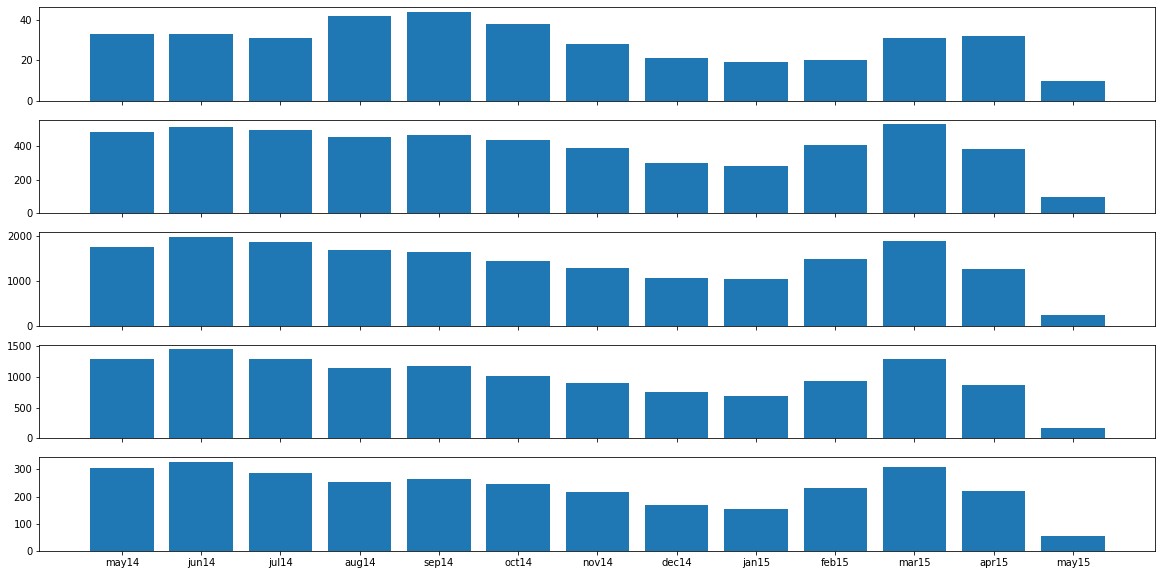

In [244]:
fig, ax = plt.subplots(5, 1, sharex=True, figsize=(20,10))

d = pd.to_datetime(df1['date'])
#To understand time limits
print(d.sort_values())

date_start_end_range_dictionary = {
    "20140701T000000": "20140501T000000",
    "20140801T000000": "20140601T000000",
    "20140901T000000": "20140701T000000",
    "20141001T000000": "20140801T000000",
    "20141101T000000": "20140901T000000",
    "20141201T000000": "20141001T000000",
    "20150101T000000": "20141101T000000",
    "20150201T000000": "20141201T000000",
    "20150301T000000": "20150101T000000",
    "20150401T000000": "20150201T000000",
    "20150501T000000": "20150301T000000",
    "20150601T000000": "20150401T000000",
    "20150701T000000": "20150501T000000",
}

def df_query_date_range_bedrooms(df, date_start, date_end, bedroom)-> int:
    q = 'date < ' + '\"' + date_start + '\"' + ' and date > ' + '\"' + date_end + '\"' +' and bedrooms == ' + str(bedroom)
    df.query(q)
    return len(df.query(q))

res1, res2, res3, res4, res5 = [], [], [], [], []

for item in date_start_end_range_dictionary.items():
    res1.append(df_query_date_range_bedrooms(df1, item[0], item[1], 1))
    res2.append(df_query_date_range_bedrooms(df1, item[0], item[1], 2))
    res3.append(df_query_date_range_bedrooms(df1, item[0], item[1], 3))
    res4.append(df_query_date_range_bedrooms(df1, item[0], item[1], 4))
    res5.append(df_query_date_range_bedrooms(df1, item[0], item[1], 5))

months = ['may14', 'jun14', 'jul14', 'aug14', 'sep14', 'oct14', 'nov14', 'dec14', 'jan15', 'feb15', 'mar15', 'apr15', 'may15']

ax[0].bar(months, res1)
ax[1].bar(months, res2)
ax[2].bar(months, res3)
ax[3].bar(months, res4)
ax[4].bar(months, res5)

plt.show()
